### Importing Needed packages

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


from sklearn import linear_model

### Reading the data in

In [3]:
df = pd.read_csv("My_data\\NOx_only_ML_data.csv")

# take a look at the dataset
df.head()


,Engine speed [rpm],Injection amount [mg/stroke],Fuel Rail Pressure Measured [psi],Load [ft.lb],NOx sensor [ppm]
0,1012.972434,17.842621,10491.082273,65.0,447.378711
1,1013.326065,21.835041,10854.393509,80.0,519.147084
2,1013.061243,26.607644,11821.801967,95.0,594.816263
3,1162.430168,20.691577,14000.537602,50.0,315.653665
4,1163.733231,25.109175,14498.228219,75.0,433.740917


In [8]:
cdf = df[['Engine speed [rpm]','Injection amount [mg/stroke]','Fuel Rail Pressure Measured [psi]',
           'Load [ft.lb]','NOx sensor [ppm]']]
cdf.head(9)

,Engine speed [rpm],Injection amount [mg/stroke],Fuel Rail Pressure Measured [psi],Load [ft.lb],NOx sensor [ppm]
0,1012.972434,17.842621,10491.082273,65.0,447.378711
1,1013.326065,21.835041,10854.393509,80.0,519.147084
2,1013.061243,26.607644,11821.801967,95.0,594.816263
3,1162.430168,20.691577,14000.537602,50.0,315.653665
4,1163.733231,25.109175,14498.228219,75.0,433.740917
5,1163.335060,30.027807,14919.671848,100.0,535.414863
6,1162.973658,32.745473,14988.927889,125.0,631.458670
7,1163.017453,33.640447,15003.329149,135.0,675.008411
8,1147.766234,37.114610,15048.668831,150.0,679.130598


### Data Exploration

In [9]:
# summarize the data
df.describe()

,Engine speed [rpm],Injection amount [mg/stroke],Fuel Rail Pressure Measured [psi],Load [ft.lb],NOx sensor [ppm]
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1679.718294,52.114394,13552.153210,169.749651,334.909800
std,407.625586,22.517723,1571.424537,84.257892,189.254382
min,1001.000000,16.800000,10117.170070,48.751734,98.494938
25%,1361.039779,33.470278,12204.625000,100.000000,190.131700
50%,1637.749373,47.077694,14072.148041,160.000000,287.031816
75%,2000.000000,68.389414,14903.027389,225.000000,415.582013
max,2506.771304,107.634716,17250.674419,380.000000,903.862128


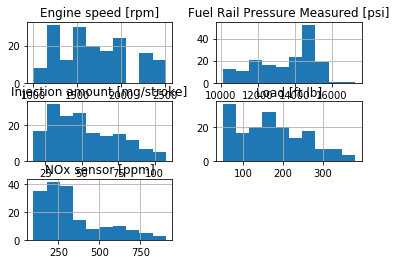

In [10]:
viz = cdf[['Engine speed [rpm]','Injection amount [mg/stroke]','Fuel Rail Pressure Measured [psi]',
           'Load [ft.lb]','NOx sensor [ppm]']]
viz.hist()
plt.show()

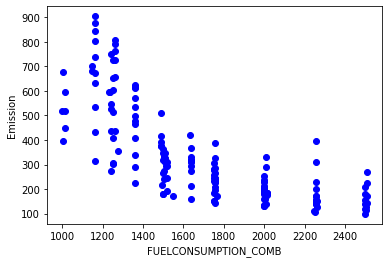

In [12]:
plt.scatter(cdf['Engine speed [rpm]'], cdf['NOx sensor [ppm]'],  color='blue')
plt.xlabel("Engine speed [rpm]")
plt.ylabel("NOx sensor [ppm]")
plt.show()

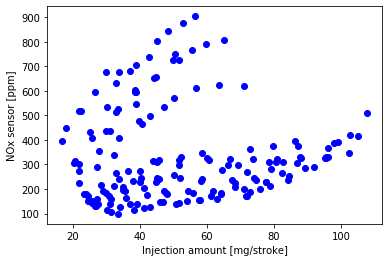

In [13]:
plt.scatter(cdf['Injection amount [mg/stroke]'], cdf['NOx sensor [ppm]'],  color='blue')
plt.xlabel("Injection amount [mg/stroke]")
plt.ylabel("NOx sensor [ppm]")
plt.show()

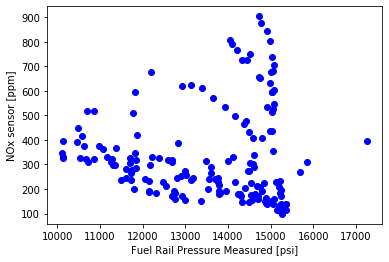

In [14]:
plt.scatter(cdf['Fuel Rail Pressure Measured [psi]'], cdf['NOx sensor [ppm]'],  color='blue')
plt.xlabel("Fuel Rail Pressure Measured [psi]")
plt.ylabel("NOx sensor [ppm]")
plt.show()

### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function:



In [15]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

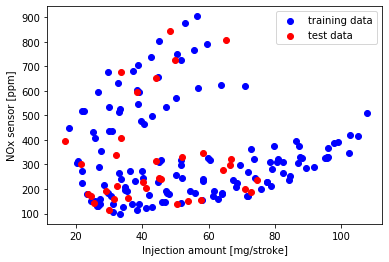

In [20]:
plt.scatter(train['Injection amount [mg/stroke]'], train['NOx sensor [ppm]'],  color='blue',label = 'training data')
plt.scatter(test['Injection amount [mg/stroke]'], test['NOx sensor [ppm]'],  color='red',label = 'test data')
plt.xlabel("Injection amount [mg/stroke]")
plt.ylabel("NOx sensor [ppm]")
plt.legend()
plt.show()


In [28]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Injection amount [mg/stroke]']])
train_y = np.asanyarray(train[['NOx sensor [ppm]']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.0060509]]
Intercept:  [337.81325536]


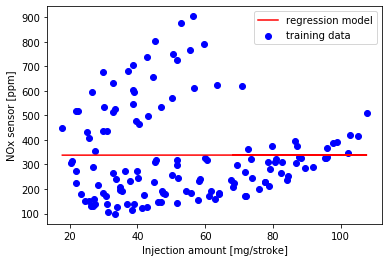

In [30]:
plt.scatter(train['Injection amount [mg/stroke]'], train['NOx sensor [ppm]'],  color='blue',label = 'training data')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label = 'regression model')
plt.xlabel("Injection amount [mg/stroke]")
plt.ylabel("NOx sensor [ppm]")
plt.legend()

In [31]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Injection amount [mg/stroke]']])
test_y = np.asanyarray(test[['NOx sensor [ppm]']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 157.71
Residual sum of squares (MSE): 40288.94
R2-score: -4366563.31


<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

In [35]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Engine speed [rpm]','Injection amount [mg/stroke]','Fuel Rail Pressure Measured [psi]']])
y = np.asanyarray(train[['NOx sensor [ppm]']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.45327745  4.36552498  0.06148169]]


### Prediction

In [57]:
y_hat_train= regr.predict(train[['Engine speed [rpm]','Injection amount [mg/stroke]','Fuel Rail Pressure Measured [psi]']])

y_hat_test= regr.predict(test[['Engine speed [rpm]','Injection amount [mg/stroke]','Fuel Rail Pressure Measured [psi]']])
x = np.asanyarray(test[['Engine speed [rpm]','Injection amount [mg/stroke]','Fuel Rail Pressure Measured [psi]']])
y = np.asanyarray(test[['NOx sensor [ppm]']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat_test - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 9579.73
Variance score: 0.76


### Model vs Experiment

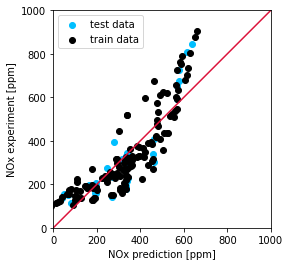

In [61]:
plt.plot([-50,1050],[-50,1050],  color='crimson')
plt.scatter(y_hat_test, test['NOx sensor [ppm]'],  color='deepskyblue',label = 'test data')
plt.scatter(y_hat_train, train['NOx sensor [ppm]'],  color='black',label = 'train data')
# plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label = 'regression model')
plt.xlabel("NOx prediction [ppm]")
plt.ylabel("NOx experiment [ppm]")
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

## Nonlinear regression

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['Injection amount [mg/stroke]']])
train_y = np.asanyarray(train[['NOx sensor [ppm]']])

test_x = np.asanyarray(test[['Injection amount [mg/stroke]']])
test_y = np.asanyarray(test[['NOx sensor [ppm]']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 1.78426209e+01, 3.18359119e+02],
       [1.00000000e+00, 2.18350406e+01, 4.76768997e+02],
       [1.00000000e+00, 2.66076442e+01, 7.07966728e+02],
       [1.00000000e+00, 2.06915771e+01, 4.28141364e+02],
       [1.00000000e+00, 2.51091750e+01, 6.30470670e+02],
       [1.00000000e+00, 3.00278066e+01, 9.01669167e+02],
       [1.00000000e+00, 3.27454725e+01, 1.07226597e+03],
       [1.00000000e+00, 3.71146104e+01, 1.37749430e+03],
       [1.00000000e+00, 3.88142827e+01, 1.50654854e+03],
       [1.00000000e+00, 4.27300117e+01, 1.82585390e+03],
       [1.00000000e+00, 4.51650102e+01, 2.03987815e+03],
       [1.00000000e+00, 5.28475059e+01, 2.79285888e+03],
       [1.00000000e+00, 5.64646148e+01, 3.18825272e+03],
       [1.00000000e+00, 2.56385542e+01, 6.57335462e+02],
       [1.00000000e+00, 3.29434343e+01, 1.08526987e+03],
       [1.00000000e+00, 3.88984218e+01, 1.51308722e+03],
       [1.00000000e+00, 4.46956785e+01, 1.99770368e+03],
       [1.00000000e+00, 5.15452

In [75]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.          0.77046856 -0.00640112]]
Intercept:  [318.72469114]


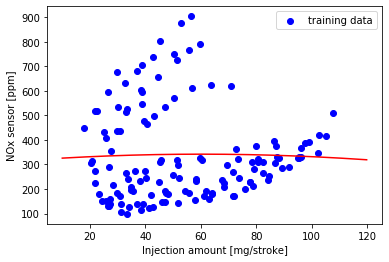

In [76]:
plt.scatter(train['Injection amount [mg/stroke]'], train['NOx sensor [ppm]'],  color='blue',label = 'training data')
XX = np.arange(10.0, 120.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Injection amount [mg/stroke]")
plt.ylabel("NOx sensor [ppm]")
plt.legend()

### Evaluation

In [78]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 158.05
Residual sum of squares (MSE): 40081.45
R2-score: -4038.93


### Nonlinear multiple regression

In [99]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['Engine speed [rpm]','Injection amount [mg/stroke]','Fuel Rail Pressure Measured [psi]']])
train_y = np.asanyarray(train[['NOx sensor [ppm]']])

test_x = np.asanyarray(test[['Engine speed [rpm]','Injection amount [mg/stroke]','Fuel Rail Pressure Measured [psi]']])
test_y = np.asanyarray(test[['NOx sensor [ppm]']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 1.01297243e+03, 1.78426209e+01, ...,
        3.18359119e+02, 1.87188403e+05, 1.10062807e+08],
       [1.00000000e+00, 1.01332606e+03, 2.18350406e+01, ...,
        4.76768997e+02, 2.37006123e+05, 1.17817858e+08],
       [1.00000000e+00, 1.01306124e+03, 2.66076442e+01, ...,
        7.07966728e+02, 3.14550300e+05, 1.39755002e+08],
       ...,
       [1.00000000e+00, 2.50400000e+03, 4.29000000e+01, ...,
        1.84041000e+03, 6.56198400e+05, 2.33967616e+08],
       [1.00000000e+00, 2.49800000e+03, 6.41000000e+01, ...,
        4.10881000e+03, 9.37590700e+05, 2.13949129e+08],
       [1.00000000e+00, 2.50000000e+03, 6.83000000e+01, ...,
        4.66489000e+03, 1.00803970e+06, 2.17828081e+08]])

In [97]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00 -9.14204397e-01 -1.07602129e+00 -2.55178270e-02
   5.04550359e-04 -9.29701286e-03 -6.31942333e-05 -1.84909206e-02
   1.82412006e-03  2.86119878e-06]]
Intercept:  [1322.82088679]


In [98]:
y_hat_train = clf.predict(train[['Engine speed [rpm]','Injection amount [mg/stroke]','Fuel Rail Pressure Measured [psi]']])
y_hat_test = clf.predict(test[['Engine speed [rpm]','Injection amount [mg/stroke]','Fuel Rail Pressure Measured [psi]']])


plt.plot([-50,1050],[-50,1050],  color='crimson')
plt.scatter(y_hat_test, test['NOx sensor [ppm]'],  color='deepskyblue',label = 'test data')
plt.scatter(y_hat_train, train['NOx sensor [ppm]'],  color='black',label = 'train data')
# plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label = 'regression model')
plt.xlabel("NOx prediction [ppm]")
plt.ylabel("NOx experiment [ppm]")
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 3)